In [1]:
import pandas as pd
from datetime import datetime
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.random.seed(42)

In [3]:
final_data = df = pd.read_csv('final_data.csv')

In [4]:
final_data

,Date,Gas price,Crude oil price,Inflation,Euro exchange rate,Dolar exchange rate,Gas import,PKB index,Temperature
0,2022-03,4.527,127.98,104.3,4.90878,4.50282,3557.084573,127.157356,3.7
1,2022-02,4.402,97.97,104.3,4.70200,4.19056,3557.084573,127.157356,3.5
2,2022-01,4.874,89.26,104.3,4.58055,4.07820,3557.084573,127.157356,1.2
3,2021-12,3.730,77.78,104.3,4.58921,4.03410,2162.347000,127.157356,-0.7
4,2021-11,4.567,69.23,107.8,4.66035,4.11015,2153.581000,127.157356,5.5
...,...,...,...,...,...,...,...,...,...
262,2000-05,4.360,28.31,110.0,4.09400,4.39000,3557.084573,57.533001,15.8
263,2000-04,3.140,23.89,109.8,4.06480,4.46500,3557.084573,57.365028,12.8
264,2000-03,2.940,24.77,110.3,3.93880,4.12700,3557.084573,57.195778,3.7
265,2000-02,2.760,28.08,110.4,4.01500,4.16000,3557.084573,57.025212,2.9


In [5]:
final_data  = final_data[['Date','Gas price', 'Crude oil price', 'Inflation', 'Euro exchange rate', 'Dolar exchange rate','Gas import', 'Temperature']]

In [6]:
final_data.corr()

,Gas price,Crude oil price,Inflation,Euro exchange rate,Dolar exchange rate,Gas import,Temperature
Gas price,1.000000,0.126196,0.090434,-0.425483,-0.503075,-0.055030,-0.046993
Crude oil price,0.126196,1.000000,-0.096304,-0.100349,-0.701265,-0.021490,0.037149
Inflation,0.090434,-0.096304,1.000000,-0.198217,0.151404,-0.117475,0.002758
Euro exchange rate,-0.425483,-0.100349,-0.198217,1.000000,0.444306,-0.060943,-0.008338
Dolar exchange rate,-0.503075,-0.701265,0.151404,0.444306,1.000000,-0.046900,0.009087
Gas import,-0.055030,-0.021490,-0.117475,-0.060943,-0.046900,1.000000,-0.071563
Temperature,-0.046993,0.037149,0.002758,-0.008338,0.009087,-0.071563,1.000000


<AxesSubplot:>

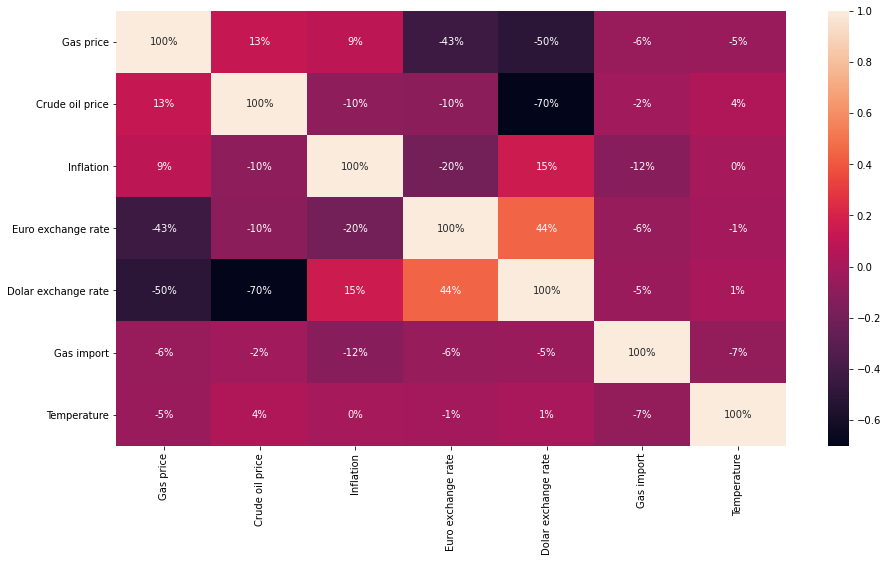

In [7]:
plt.figure(figsize=(15,8))  
sns.heatmap(final_data.corr(), annot=True, fmt='.0%')

In [8]:
final_data['Date'] =pd.to_datetime(final_data['Date'], infer_datetime_format = True)

<ipython-input-8-401900860ae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Date'] =pd.to_datetime(final_data['Date'], infer_datetime_format = True)


In [9]:
final_data = final_data.set_index('Date')

In [10]:
train_data=final_data[final_data.index <'2018'].copy()

In [11]:
test_data = final_data[final_data.index >='2018'].copy()

In [13]:
X,y = train_data, test_data

In [14]:
scaler=MinMaxScaler()
X= scaler.fit_transform(X)

In [16]:
X_train=[]
y_train=[]
for i in range(1,X.shape[0]):
    X_train.append(X[i-1:i])
    y_train.append(X[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(215, 1, 7) (215,)


##  Model numer 1 rekurencyjne sieci neuronowe GRU

In [22]:
model = tf.keras.Sequential()

In [23]:
model.add(tf.keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],7)))
model.add(tf.keras.layers.Dropout(0.2))

In [24]:
model.add(tf.keras.layers.GRU(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

In [25]:
model.add(tf.keras.layers.GRU(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

In [26]:
model.add(tf.keras.layers.GRU(units=50, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=25))
model.add(tf.keras.layers.Dense(units=1))


In [28]:
look_back =train_data.tail(1)
data = look_back.append(test_data)


In [29]:
inputs = scaler.transform(data)

In [30]:
X_test=[]
y_test=[]
for i in range(1, inputs.shape[0]):
    X_test.append(inputs[i-1:i])
    y_test.append(inputs[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(51, 1, 7) (51,)


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping=EarlyStopping(monitor='loss', patience=10)
history=model.fit(X_train, y_train,
                 epochs =200,
                 batch_size=32, validation_data=(X_test, y_test),
                 callbacks=[early_stopping])

Epoch 1/200
7/7 [==============================] - 5s 153ms/step - loss: 0.0748 - val_loss: 0.0142
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0406 - val_loss: 0.0581
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0360 - val_loss: 0.0307
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0335 - val_loss: 0.0220
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0329 - val_loss: 0.0232
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0270
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0265 - val_loss: 0.0162
Epoch 8/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0214 - val_loss: 0.0094
Epoch 9/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0162 - val_loss: 0.0062
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0132 - val_loss: 0.0035
Epoch 11/200
7/7 [=========

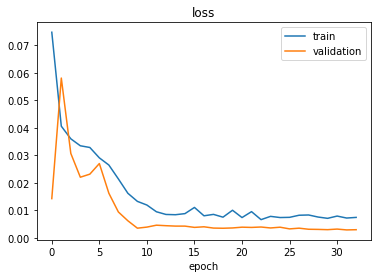

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.show()

In [33]:
y_pred = model.predict(X_test)

In [34]:
scaler.scale_

array([0.08193363, 0.00828569, 0.07575758, 0.59608965, 0.38704184,
       0.0010582 , 0.03164557])

In [35]:
scale=1/0.08193363
scale

12.205000559599277

In [36]:
y_pred=y_pred*scale
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns={0:'Prediction'}, inplace=True)

In [37]:
y_test = y_test*scale
y_test = pd.DataFrame(y_test)
y_test.rename(columns={0:'Actual gas prices'}, inplace=True)

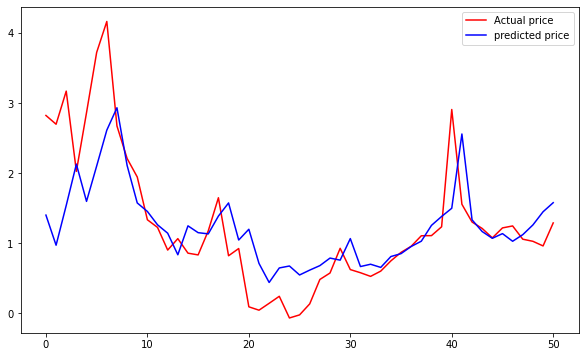

In [40]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color='red', label='Actual price')
plt.plot(y_pred, color= 'blue', label ='predicted price')
plt.legend()
plt.show()

In [43]:
MSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('Mean squared error: ', MSE)
print('R2 Score : ', r2_score(y_test, y_pred))

Mean squared error:  0.6623252981127957
R2 Score :  0.5185830254551151


## Model numer 2 rekurencyjne sieci neuronowe LSTM

In [45]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],7)))
#model.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.GRU(units=50, return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.GRU(units=50, return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.GRU(units=50, return_sequences=False))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(units=25))
model2.add(tf.keras.layers.Dense(units=1))



In [46]:
look_back =train_data.tail(1)
data = look_back.append(test_data)

In [47]:
inputs = scaler.transform(data)

In [48]:
X_test=[]
y_test=[]
for i in range(1, inputs.shape[0]):
    X_test.append(inputs[i-1:i])
    y_test.append(inputs[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(51, 1, 7) (51,)


In [49]:
model2.compile(optimizer='adam', loss='mean_squared_error')
early_stopping=EarlyStopping(monitor='loss', patience=10)
history=model2.fit(X_train, y_train,
                 epochs =200,
                 batch_size=32, validation_data=(X_test, y_test),
                 callbacks=[early_stopping])

Epoch 1/200
7/7 [==============================] - 5s 154ms/step - loss: 0.0741 - val_loss: 0.0102
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0390 - val_loss: 0.0626
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0381 - val_loss: 0.0329
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0343 - val_loss: 0.0183
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0335 - val_loss: 0.0260
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0289 - val_loss: 0.0293
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0273 - val_loss: 0.0199
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0223 - val_loss: 0.0148
Epoch 9/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0164 - val_loss: 0.0047
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0129 - val_loss: 0.0031
Epoch 11/200
7/7 [=========

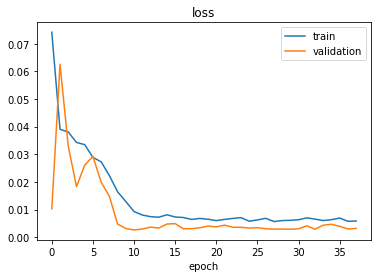

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.show()

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred=y_pred*scale
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns={0:'Prediction'}, inplace=True)

In [54]:
y_test = y_test*scale
y_test = pd.DataFrame(y_test)
y_test.rename(columns={0:'Actual gas prices'}, inplace=True)

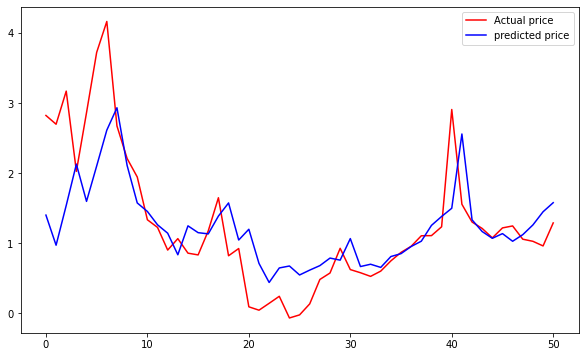

In [55]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color='red', label='Actual price')
plt.plot(y_pred, color= 'blue', label ='predicted price')
plt.legend()
plt.show()

In [56]:
MSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('Mean squared error: ', MSE)
print('R2 Score : ', r2_score(y_test, y_pred))

Mean squared error:  0.6623252981127957
R2 Score :  0.5185830254551151
